In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from copy import deepcopy

from neurodynex3.hopfield_network import plot_tools

# Helper Functions

In [2]:
# function get_patterns
def get_pattern(size, num):
    
    temp = np.random.binomial(1, 0.5, (num,size,size)) #makes array filled with 1s & 0s both equally likely
    patterns = 2*temp - 1 #makes the array 'patterns' which is same as temp but with -1s in place of 0s
    
    return patterns
    
    


#function to create weight matrix, given patterns. The shape of the patterns fix size of the square weight matrix
#and hence number of neurons. Weight matrix is all we need to know about the network and its memory


def init_hopfield(patterns):
    
    size = np.shape(patterns)[1]
    num_patterns = np.shape(patterns)[0]
    
    N = size**2 #number of neurons equals number of 'pixels' in the patterns which is size**2
    
    weights = np.zeros((N,N))
    
    for i in range(N):
        for j in range(N):
            if i == j:
                weights[i,j] = 0
            else:
                weights[i,j] = (1/num_patterns)*np.sum(patterns[:, i//size, i%size]*patterns[:,j//size,j%size])
                
    return weights
    


    
# function to generate random cue

def get_cue(size):
    
    temp = np.random.binomial(1, 0.5, (size,size))
    cue = 2*temp - 1
    
    return cue

# One update Hopfield network SYNCHRONOUSLY; optionally plot
def update_hopfield_sync(weights, cue, plot=True):
    size = np.shape(cue)[0]
    
    copy_state = cue
    copy_state_flat = copy_state.flatten()
    new_state = np.zeros((size,size))
    
    for i in range(size):
        for j in range(size):
            val = np.sum(weights[size*i + j,:]*copy_state_flat[:])
            if val < 0:
                new_state[i,j] = -1
            else:
                new_state[i,j] = 1
    
    if plot == True:
        plot_tools.plot_pattern(new_state)
        
    return new_state

# One update Hopfield network ASYNCHRONOUSLY; optionally plot
def update_hopfield_async(weights, cue, plot=True):
    
    size = np.shape(cue)[0]
    copy_state_flat = cue.flatten()
    new_state = np.zeros((size,size))
    
    for i in range(size**2):
        val = np.sum(np.multiply(weights[i,:], copy_state_flat[:]))
        if val < 0:
            copy_state_flat[i] = -1
        else:
            copy_state_flat[i] = 1
        
        new_state[i//size, i%size] = copy_state_flat[i]
        
    
    
    if plot == True:
        plot_tools.plot_pattern(new_state)
    
    return new_state





# Update Hopfield Network SYNCHRONOUSLY till convergence
def conv_hopfield_sync(patterns, cue, plot = True):
    
    weights = init_hopfield(patterns)
    cache = [cue]
    #i = 0
    while True:
        #print(i)
        #i+= 1
        temp = update_hopfield_sync(weights, cache[-1], plot = False)
        if any(np.array_equal(temp,x) for x in cache):
            cache.append(temp)
            break
        else:
            cache.append(temp)
    
    #cache = np.array(cache)
    
    if plot == True:
        plot_tools.plot_pattern_list(cache)
    
    return cache


# Update Hopfield Network ASYNCHRONOUSLY till convergence
def conv_hopfield_async(patterns, cue, plot = True):
    
    weights = init_hopfield(patterns)
    cache = [cue]
    #i = 0
    while True:
        #print(i)
        #i+= 1
        temp = update_hopfield_async(weights, cache[-1], plot = False)
        if any(np.array_equal(temp,x) for x in cache):
            cache.append(temp)
            break
        else:
            cache.append(temp)
    
    #cache = np.array(cache)
    
    if plot == True:
        plot_tools.plot_pattern_list(cache)
    
    return cache



# Demo showing these functions work

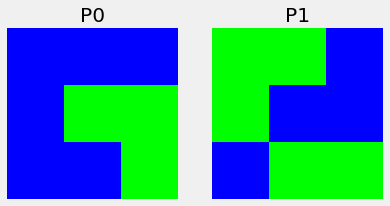

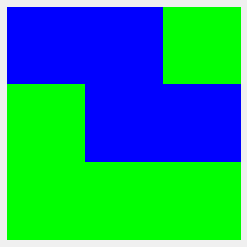

In [3]:
resolution = 3
num_patters = 2

test_patterns = get_pattern(resolution, num_patters)
plot_tools.plot_pattern_list(test_patterns)

test_cue = get_cue(resolution)
plot_tools.plot_pattern(test_cue)

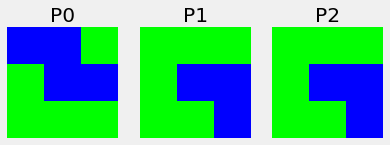

[array([[-1, -1,  1],
        [ 1, -1, -1],
        [ 1,  1,  1]]),
 array([[ 1.,  1.,  1.],
        [ 1., -1., -1.],
        [ 1.,  1., -1.]]),
 array([[ 1.,  1.,  1.],
        [ 1., -1., -1.],
        [ 1.,  1., -1.]])]

In [4]:
#Asynchronous Hopfield Network

conv_hopfield_async(test_patterns, test_cue)


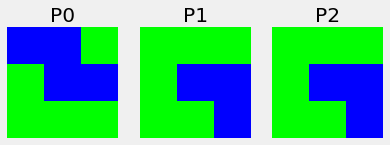

[array([[-1, -1,  1],
        [ 1, -1, -1],
        [ 1,  1,  1]]),
 array([[ 1.,  1.,  1.],
        [ 1., -1., -1.],
        [ 1.,  1., -1.]]),
 array([[ 1.,  1.,  1.],
        [ 1., -1., -1.],
        [ 1.,  1., -1.]])]

In [5]:
#Synchronous Hopfield Network

conv_hopfield_sync(test_patterns, test_cue)

# A difference between synchronous and asynchronous hopfield networks

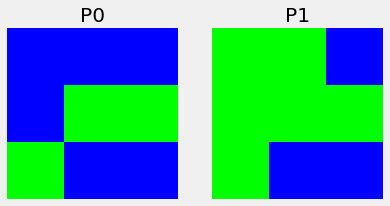

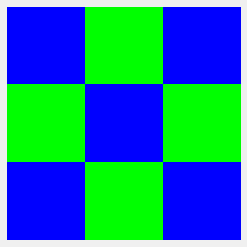

In [6]:
special_patterns = np.array([[[-1, -1, -1], [-1, 1, 1], [1, -1, -1]], [[1, 1, -1], [1, 1, 1], [1, -1, -1]]])
special_cue = np.array([[-1, 1, -1], [1, -1, 1], [-1, 1, -1]])

plot_tools.plot_pattern_list(special_patterns)
plot_tools.plot_pattern(special_cue)

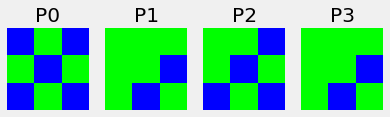

[array([[-1,  1, -1],
        [ 1, -1,  1],
        [-1,  1, -1]]),
 array([[ 1.,  1.,  1.],
        [ 1.,  1., -1.],
        [ 1., -1.,  1.]]),
 array([[ 1.,  1., -1.],
        [ 1., -1.,  1.],
        [-1.,  1., -1.]]),
 array([[ 1.,  1.,  1.],
        [ 1.,  1., -1.],
        [ 1., -1.,  1.]])]

In [7]:
conv_hopfield_sync(special_patterns, special_cue)


Note that the synchronously updated Hopfield Network need not converge but may oscillate between two (or perhaps cycle among more than two, not if this is impossible) patterns.

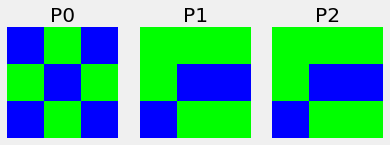

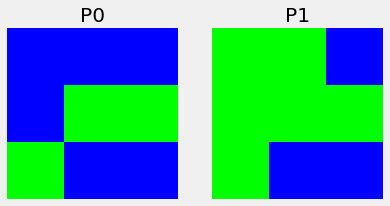

In [8]:
conv_hopfield_async(special_patterns, special_cue)
plot_tools.plot_pattern_list(special_patterns)

# Remarks:
Asynchronous Hopfield network *always* converges. Though, as in this case, need not converge to a memorized pattern. In this case it converges to the negative of the first memorized pattern - P0 in second row. This makes sense as hopfield networks are 'colour-blind' - switching -1s and 1s don't really change the dynamics <sup>**#**</sup>. So just as once the network attains a memorized state it doesn't change, the network also doesn't change once it attains a negative of a memorized state. 

**#** The negative case is not *exactly* symmetrical, since the update rule forces a neuron to stay +1 if the weighted value is > or = 0. In the negative case, it will stay -1 if and only if the weighted value is strictly < 0.